In [1]:
import numpy as np
import pandas as pd

In [113]:
data_raw = pd.read_excel('Geological Log_4.xlsx', sheet_name= 'SimpOri', index_col=0)

In [114]:
data_raw.head()

,age,From (m),To (m),Thick. (m),Layer Material Description
No. K50,,,,,
1,NaN,0,0.4,0.4,Top Soil
2,NaN,0.4,6,5.6,Silty clay
3,NaN,6,11,5,Clay
4,NaN,11,20,9,Pebbly sand
5,NaN,20,61.6,41.6,Sandy pebble


In [115]:
data_raw.sort_index(key=lambda x:x.str.capitalize())

,age,From (m),To (m),Thick. (m),Layer Material Description
No. K50,,,,,
No. K123,age,From (m),To (m),Thick. (m),Layer Material Description
No. K75,age,From (m),To (m),Thick. (m),Layer Material Description
No. K77,age,From (m),To (m),Thick. (m),Layer Material Description
1,NaN,0,0.4,0.4,Top Soil
2,NaN,0.4,6,5.6,Silty clay
...,...,...,...,...,...
110,NaN,1085.5,1087.5,2,Silty clay
111,NaN,1087.5,1089,1.5,Sand
112,NaN,1089,1125.6,36.6,Silty sand and Silty clay


In [116]:
data_set= data_raw.reset_index()

In [117]:
data_set.loc[data_set['From (m)'] == 'From (m)']

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
114,No. K75,age,From (m),To (m),Thick. (m),Layer Material Description
216,No. K77,age,From (m),To (m),Thick. (m),Layer Material Description
324,No. K123,age,From (m),To (m),Thick. (m),Layer Material Description


In [118]:
data_set[data_set['Layer Material Description'].str.contains("Silty clay and Silty sand")] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
32,34,NaN,301,332,31,Silty clay and Silty sand
98,100,NaN,1042,1054,12,Silty clay and Silty sand
117,3,NaN,23.7,34.8,11.1,Silty clay and Silty sand
143,29,NaN,182.3,186,3.7,Silty clay and Silty sand


In [119]:
data_set[data_set['Layer Material Description'].str.contains("Silty sand and Silty clay")] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
109,111,NaN,1092,1120,28,Silty sand and Silty clay
235,19,NaN,245,257,12,Silty sand and Silty clay
436,112,NaN,1089,1125.6,36.6,Silty sand and Silty clay


In [120]:
data_set['Layer Material Description'] = data_set['Layer Material Description'].str.replace('Silty clay and Silty sand',
                                                                                             'Silty sand and Silty clay')

In [121]:
data_set[data_set['Layer Material Description'].str.contains("Silty sand and Silty clay")] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
32,34,NaN,301,332,31,Silty sand and Silty clay
98,100,NaN,1042,1054,12,Silty sand and Silty clay
109,111,NaN,1092,1120,28,Silty sand and Silty clay
117,3,NaN,23.7,34.8,11.1,Silty sand and Silty clay
143,29,NaN,182.3,186,3.7,Silty sand and Silty clay
235,19,NaN,245,257,12,Silty sand and Silty clay
436,112,NaN,1089,1125.6,36.6,Silty sand and Silty clay


In [184]:
data_set['Layer Material Description'] = data_set['Layer Material Description'].str.replace('Clayey-sandy clay',
                                                                                            'Clayey sandy clay', regex=True)

In [193]:
data_set['Layer Material Description'] = data_set['Layer Material Description'].str.replace('Lignite clay',
                                                                                            'Clayey lignite')

In [185]:
data_set['Layer Material Description'].unique()

array(['Top soil', 'Silty clay', 'Clay', 'Pebbly sand', 'Sand',
       'Silty sand', 'Pebbly gravelly sand', 'Gravelly sand',
       'Lignite clay', 'Silty sand and Silty clay', 'Clayey lignite',
       'Sandstone', 'Sand, sandstone', 'Layer Material Description',
       'Sandy clay', 'Clay, sandstone', 'Silty sand, siltstone',
       'Clayey siltstone', 'Siltstone', 'Sandy siltstone', 'Lignite',
       'Clayey sandy clay'], dtype=object)

In [196]:
data_set[data_set['Layer Material Description'].str.contains("Lig")] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
206,92,NaN,583.8,584.2,0.4,Lignite
266,50,NaN,550,552,2,Lignite
270,54,NaN,581,582,1,Lignite
274,58,NaN,611.8,614.6,2.8,Lignite
310,94,NaN,1096,1097,1,Lignite
314,98,NaN,1133,1135,2,Lignite


In [197]:
K50 = data_set.iloc[:114,:]
K75 = data_set.iloc[115:216,:]
K77 = data_set.iloc[217:324,:]
K123 = data_set.iloc[325:,:]
K75.rename({'No. K50' : 'No. K75'}, axis='columns')
K77.rename({'No. K50' : 'No. K77'}, axis='columns')
K123.rename({'No. K50' : 'No. K123'}, axis='columns')

,No. K123,age,From (m),To (m),Thick. (m),Layer Material Description
325,1,Holocene,0,0.4,0.4,Top soil
326,2,Pleistocene,0.4,6,5.6,Silty clay
327,3,NaN,6,11,5,Clay
328,4,NaN,11,20,9,Pebbly sand
329,5,NaN,20,60.1,40.1,Pebbly sand
...,...,...,...,...,...,...
434,110,NaN,1085.5,1087.5,2,Silty clay
435,111,NaN,1087.5,1089,1.5,Sand
436,112,NaN,1089,1125.6,36.6,Silty sand and Silty clay
437,113,NaN,1125.6,1157.6,32,"Sand, sandstone"


In [198]:
print(K50.shape)
print(K75.shape)
print(K77.shape)
print(K123.shape)

(114, 6)
(101, 6)
(107, 6)
(114, 6)


In [205]:
K50.astype({'From (m)': 'float', 'To (m)': 'float', 'Thick. (m)': 'float'}).dtypes
K75.astype({'From (m)': 'float', 'To (m)': 'float', 'Thick. (m)': 'float'}).dtypes
K77.astype({'From (m)': 'float', 'To (m)': 'float', 'Thick. (m)': 'float'}).dtypes
K123.astype({'From (m)': 'float', 'To (m)': 'float', 'Thick. (m)': 'float'}).dtypes

No. K50                        object
age                            object
From (m)                      float64
To (m)                        float64
Thick. (m)                    float64
Layer Material Description     object
dtype: object

In [206]:
K50.to_excel('K50.xlsx')
K75.to_excel('K75.xlsx')
K77.to_excel('K77.xlsx')
K123.to_excel('K123.xlsx')

In [207]:
with pd.ExcelWriter('well.xlsx') as writer:  
    K50.to_excel(writer, sheet_name='1_K50')  
    K75.to_excel(writer, sheet_name='1_K75')  
    K77.to_excel(writer, sheet_name='1_K77')  
    K123.to_excel(writer, sheet_name='1_K123')  

In [208]:
K50.sort_values(by = 'age', key = lambda col:col.str.capitalize())

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
6,7,Holocene,65,88,23,Pebbly sand
7,8,Pleistocene,88,91,3,Clay
0,1,NaN,0,0.4,0.4,Top soil
1,2,NaN,0.4,6,5.6,Silty clay
2,3,NaN,6,11,5,Clay
...,...,...,...,...,...,...
109,111,NaN,1092,1120,28,Silty sand and Silty clay
110,112,NaN,1120,1122.2,2.2,Clayey lignite
111,113,NaN,1122.2,1160,37.8,"Sand, sandstone"
112,114,NaN,1160,1170,10,Clay


In [209]:
K50['Layer Material Description'].sort_values()

56                          Clay
80                          Clay
41                          Clay
38                          Clay
35                          Clay
                 ...            
63                    Silty sand
32     Silty sand and Silty clay
109    Silty sand and Silty clay
98     Silty sand and Silty clay
0                       Top soil
Name: Layer Material Description, Length: 114, dtype: object

In [213]:
K50.loc[(K50['Layer Material Description'].str.contains('Sand')) & (K50['Thick. (m)']>=5)] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
28,30,NaN,268,274,6,Sand
30,32,NaN,286.6,294,7.4,Sand
39,41,NaN,479,495,16,Sand
44,46,NaN,573,579,6,Sand
48,50,NaN,617.6,629,11.4,Sand
50,52,NaN,657.2,662.4,5.2,Sand
71,73,NaN,805,814,9,Sand
83,85,NaN,919,927,8,Sand
100,102,NaN,1057,1062,5,Sand
104,106,NaN,1073,1078.2,5.2,Sand


In [215]:
K75.loc[(K75['Layer Material Description'].str.contains('Sand')) & (K75['Thick. (m)']>=5)] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
210,96,NaN,587.8,593,5.2,Sand
212,98,NaN,633,641.4,8.4,Sand


In [241]:
K77.loc[(K77['Layer Material Description'].str.fullmatch('Sand')) & (K77['Thick. (m)']>=5)] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
236,20,NaN,257,262,5,Sand
241,25,NaN,275.6,286.4,10.8,Sand
251,35,NaN,410.8,416.4,5.6,Sand
253,37,NaN,431,445,14,Sand
262,46,NaN,495,501.6,6.6,Sand
276,60,NaN,632.6,637.8,5.2,Sand
281,65,NaN,740.2,748.2,8,Sand
288,72,NaN,817.4,826.6,9.2,Sand
301,85,NaN,1002.8,1010,7.2,Sand
316,100,NaN,1137.2,1168.7,31.5,Sand


In [217]:
K123.loc[(K123['Layer Material Description'].str.contains('Sand')) & (K123['Thick. (m)']>=5)] 

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description
359,35,NaN,271,276.2,5.2,Sand
372,48,NaN,484.2,496,11.8,Sand
377,53,NaN,560.2,567,6.8,Sand
379,55,NaN,623.2,632.7,9.5,Sand
392,68,NaN,752.9,758,5.1,Sand
399,75,NaN,810.3,818.4,8.1,Sand
401,77,NaN,824.2,830.7,6.5,Sand
411,87,NaN,924.7,929.7,5,Sand
431,107,NaN,1076,1081.9,5.9,Sand
437,113,NaN,1125.6,1157.6,32,"Sand, sandstone"


In [214]:
print(K50['Thick. (m)'].sum())
print(K75['Thick. (m)'].sum()) #shallow
print(K77['Thick. (m)'].sum())
print(K123['Thick. (m)'].sum())

1177.0
686.0
1268.0
1177.8


In [242]:
import matplotlib.pyplot as plt

In [243]:
import matplotlib.colors as mcolors
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [244]:
n = mcolors.CSS4_COLORS.keys()

In [245]:
c = mcolors.CSS4_COLORS.values()

In [246]:
n = pd.DataFrame(data=n, index=None)

In [247]:
c = pd.DataFrame(data=c, index=None)

In [248]:
cn = pd.concat([n,c], axis=1)
cn.rename(columns = {0:'name' , 0: ' color code'}, inplace = True)

In [249]:
cn.shape

(148, 2)

In [250]:
cn.iloc[2,0]

'aqua'

In [36]:
np.random.randint(len(cn.values))

4

In [251]:
len(data_set['Layer Material Description'].unique())

21

In [253]:
colors = []
names = []
for i in range (len(data_set['Layer Material Description'].unique())) : 
    i = np.random.randint(len(cn.values)/2)
    names.append(cn.iloc[i,0])
    colors.append(cn.iloc[i,1])
    
names, colors = np.array(names), np.array(colors)
print(names)
print(colors)

['lightgoldenrodyellow' 'bisque' 'ivory' 'firebrick' 'goldenrod'
 'cadetblue' 'lightgrey' 'lawngreen' 'dimgray' 'darksalmon' 'lightgrey'
 'brown' 'azure' 'deeppink' 'lightblue' 'darkgrey' 'grey' 'bisque'
 'darkblue' 'darkseagreen' 'darkred']
['#FAFAD2' '#FFE4C4' '#FFFFF0' '#B22222' '#DAA520' '#5F9EA0' '#D3D3D3'
 '#7CFC00' '#696969' '#E9967A' '#D3D3D3' '#A52A2A' '#F0FFFF' '#FF1493'
 '#ADD8E6' '#A9A9A9' '#808080' '#FFE4C4' '#00008B' '#8FBC8F' '#8B0000']


In [254]:
print(colors.shape)

(21,)


In [258]:
mat = []
for m in data_set['Layer Material Description'].unique():
    mat.append(m)

mat = np.array(mat)
print(mat.shape)

(21,)


In [259]:
mat_color = pd.DataFrame({'name' : names, 'color': colors, 'material':mat})
print(mat_color)

                    name    color                    material
0   lightgoldenrodyellow  #FAFAD2                    Top soil
1                 bisque  #FFE4C4                  Silty clay
2                  ivory  #FFFFF0                        Clay
3              firebrick  #B22222                 Pebbly sand
4              goldenrod  #DAA520                        Sand
5              cadetblue  #5F9EA0                  Silty sand
6              lightgrey  #D3D3D3        Pebbly gravelly sand
7              lawngreen  #7CFC00               Gravelly sand
8                dimgray  #696969              Clayey lignite
9             darksalmon  #E9967A   Silty sand and Silty clay
10             lightgrey  #D3D3D3                   Sandstone
11                 brown  #A52A2A             Sand, sandstone
12                 azure  #F0FFFF  Layer Material Description
13              deeppink  #FF1493                  Sandy clay
14             lightblue  #ADD8E6             Clay, sandstone
15      

In [260]:
mat_c = mat_color.set_index('material')

In [261]:
dup_mat = mat_c.duplicated()
print(dup_mat)

material
Top soil                      False
Silty clay                    False
Clay                          False
Pebbly sand                   False
Sand                          False
Silty sand                    False
Pebbly gravelly sand          False
Gravelly sand                 False
Clayey lignite                False
Silty sand and Silty clay     False
Sandstone                      True
Sand, sandstone               False
Layer Material Description    False
Sandy clay                    False
Clay, sandstone               False
Silty sand, siltstone         False
Clayey siltstone              False
Siltstone                      True
Sandy siltstone               False
Lignite                       False
Clayey sandy clay             False
dtype: bool


In [262]:
K50_plot = pd.merge( K50, mat_c, left_on=["Layer Material Description"],
                  right_index=True, how="left", sort=False)
K50_plot

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description,name,color
0,1,NaN,0,0.4,0.4,Top soil,lightgoldenrodyellow,#FAFAD2
1,2,NaN,0.4,6,5.6,Silty clay,bisque,#FFE4C4
2,3,NaN,6,11,5,Clay,ivory,#FFFFF0
3,4,NaN,11,20,9,Pebbly sand,firebrick,#B22222
4,5,NaN,20,61.6,41.6,Pebbly sand,firebrick,#B22222
...,...,...,...,...,...,...,...,...
109,111,NaN,1092,1120,28,Silty sand and Silty clay,darksalmon,#E9967A
110,112,NaN,1120,1122.2,2.2,Clayey lignite,dimgray,#696969
111,113,NaN,1122.2,1160,37.8,"Sand, sandstone",brown,#A52A2A
112,114,NaN,1160,1170,10,Clay,ivory,#FFFFF0


In [295]:
K50_plot.iloc[5:10,:]

,No. K50,age,From (m),To (m),Thick. (m),Layer Material Description,name,color
5,6,NaN,61.6,65,3.4,Clay,ivory,#FFFFF0
6,7,Holocene,65,88,23,Pebbly sand,firebrick,#B22222
7,8,Pleistocene,88,91,3,Clay,ivory,#FFFFF0
8,9,NaN,91,93,2,Sand,goldenrod,#DAA520
9,10,NaN,93,98,5,Silty sand,cadetblue,#5F9EA0


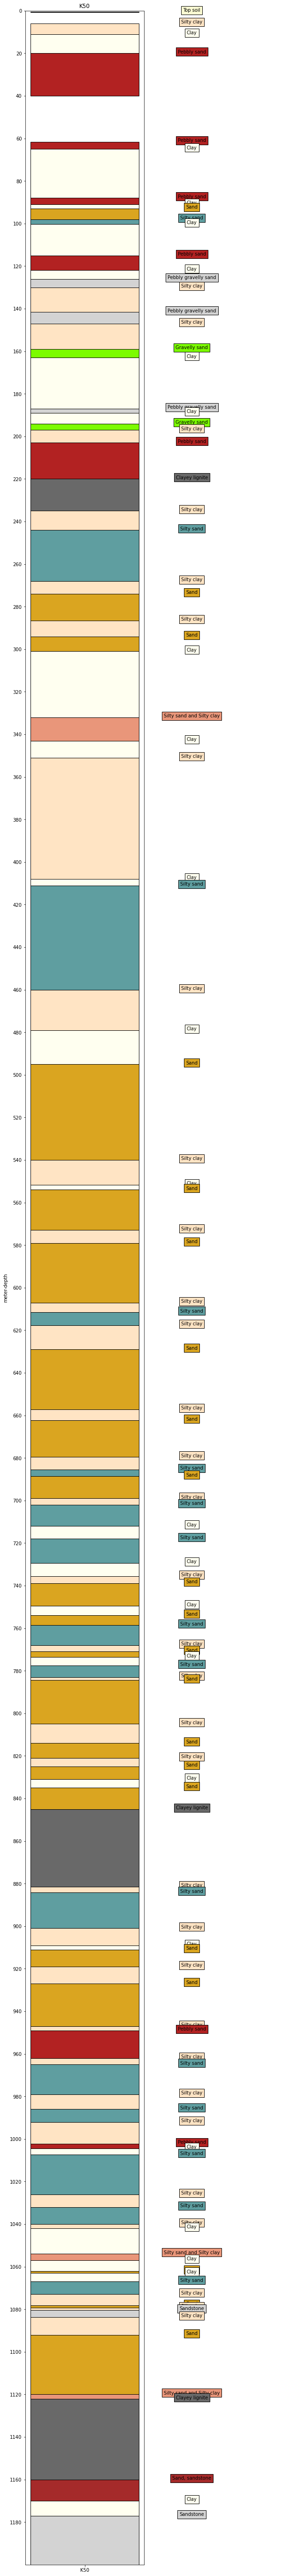

In [302]:
fig, ax= plt.subplots(nrows=1,ncols=2, sharey=True, figsize = (10,100))

x=['K50']
height = 0

for j in range(len(K50_plot['Layer Material Description'])):
    height += K50_plot['Thick. (m)'].values[j]
    mate =  K50_plot['Layer Material Description'].values[j]
    c = K50_plot['name'].values[j]

    ax[0].bar(x, height, bottom=height, facecolor=c, edgecolor = 'black')
    ax[0].set_yticks(np.arange(0,1200,20))
    ax[0].set_ylabel('meter-depth')
    ax[0].set_ylim([1200,0])
    ax[0].set_title('K50')
    ax[1].text(.2, height,s=mate, color='black', backgroundcolor=c,
               bbox = dict(facecolor=c, alpha=1), ha = 'center')
    ax[1].axis('off')

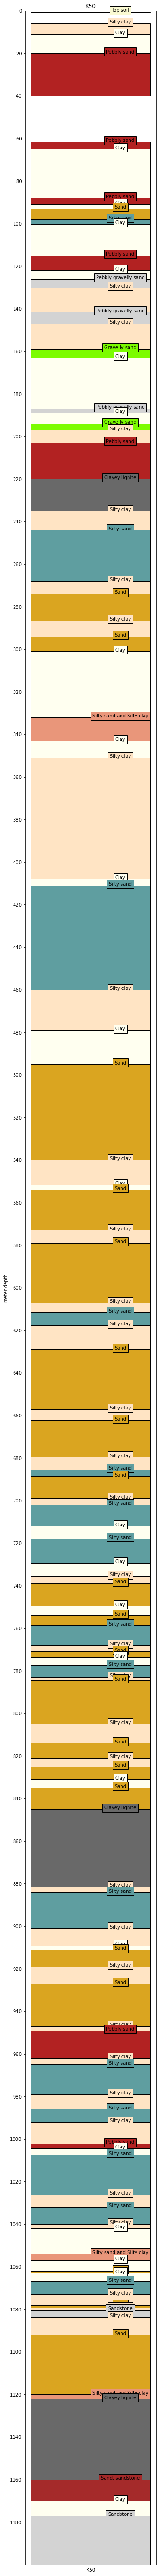

In [308]:
fig, ax= plt.subplots(sharey=True, figsize = (5,100))

x=['K50']
height = 0

for j in range(len(K50_plot['Layer Material Description'])):
    height += K50_plot['Thick. (m)'].values[j]
    mate =  K50_plot['Layer Material Description'].values[j]
    c = K50_plot['name'].values[j]

    ax.bar(x, height, bottom=height, facecolor=c, edgecolor = 'black')
    ax.set_yticks(np.arange(0,1200,20))
    ax.set_ylabel('meter-depth')
    ax.set_ylim([1200,0])
    ax.set_title('K50')
    ax.text(.2, height,s=mate, color='black', ha = 'center',backgroundcolor=c, bbox = dict(facecolor=c, alpha=1))
#     ax.axis('off')

In [309]:
K75_plot = pd.merge( K75, mat_c, left_on=["Layer Material Description"],
                  right_index=True, how="left", sort=False)
K77_plot = pd.merge( K77, mat_c, left_on=["Layer Material Description"],
                  right_index=True, how="left", sort=False)
K123_plot = pd.merge( K123, mat_c, left_on=["Layer Material Description"],
                  right_index=True, how="left", sort=False)

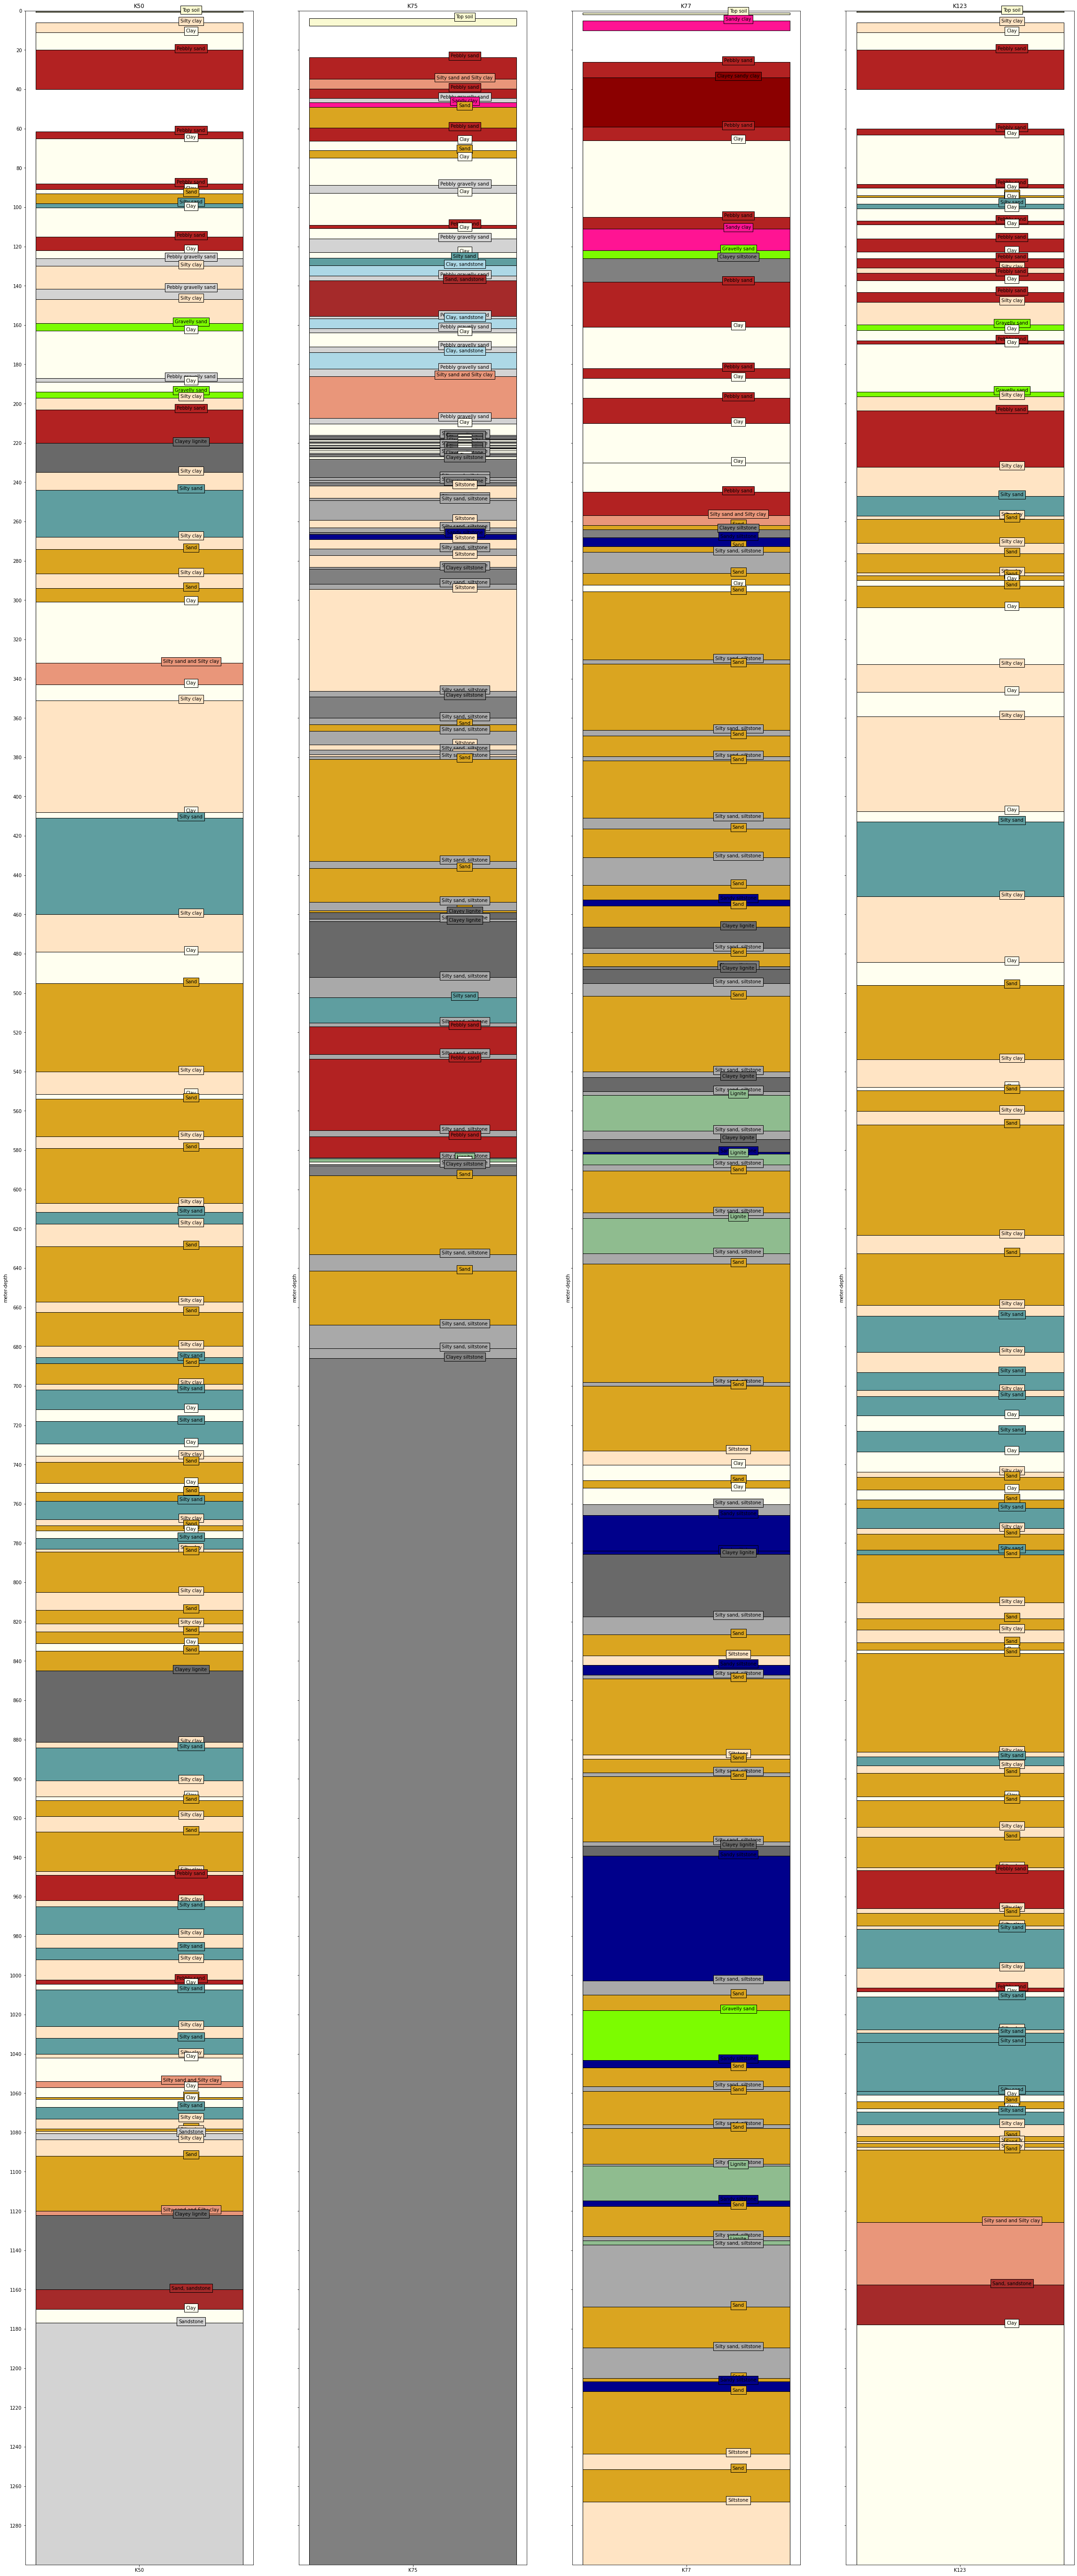

In [313]:
fig, ax= plt.subplots(nrows=1,ncols=4,sharey=True, figsize = (40,100))

x_K50=['K50']
height_K50 = 0

for a in range(len(K50_plot['Layer Material Description'])):
    height_K50 += K50_plot['Thick. (m)'].values[a]
    mate_K50 =  K50_plot['Layer Material Description'].values[a]
    c_K50 = K50_plot['name'].values[a]

    ax[0].bar(x_K50, height_K50, bottom=height_K50, facecolor=c_K50, edgecolor = 'black')
    ax[0].set_yticks(np.arange(0,1300,20))
    ax[0].set_ylabel('meter-depth')
    ax[0].set_ylim([1300,0])
    ax[0].set_title('K50')
    ax[0].text(.2, height_K50,s=mate_K50, color='black', ha = 'center',
               backgroundcolor=c_K50, bbox = dict(facecolor=c_K50, alpha=1))

x_K75=['K75']
height_K75 = 0

for b in range(len(K75_plot['Layer Material Description'])):
    height_K75 += K75_plot['Thick. (m)'].values[b]
    mate_K75 =  K75_plot['Layer Material Description'].values[b]
    c_K75 = K75_plot['name'].values[b]

    ax[1].bar(x_K75, height_K75, bottom=height_K75, facecolor=c_K75, edgecolor = 'black')
    ax[1].set_yticks(np.arange(0,1300,20))
    ax[1].set_ylabel('meter-depth')
    ax[1].set_ylim([1300,0])
    ax[1].set_title('K75')
    ax[1].text(.2, height_K75,s=mate_K75, color='black', ha = 'center',
               backgroundcolor=c_K75, bbox = dict(facecolor=c_K75, alpha=1))
    
x_K77=['K77']
height_K77 = 0

for c in range(len(K77_plot['Layer Material Description'])):
    height_K77 += K77_plot['Thick. (m)'].values[c]
    mate_K77 =  K77_plot['Layer Material Description'].values[c]
    c_K77 = K77_plot['name'].values[c]

    ax[2].bar(x_K77, height_K77, bottom=height_K77, facecolor=c_K77, edgecolor = 'black')
    ax[2].set_yticks(np.arange(0,1300,20))
    ax[2].set_ylabel('meter-depth')
    ax[2].set_ylim([1300,0])
    ax[2].set_title('K77')
    ax[2].text(.2, height_K77,s=mate_K77, color='black', ha = 'center',
               backgroundcolor=c_K77, bbox = dict(facecolor=c_K77, alpha=1))
    
x_K123=['K123']
height_K123 = 0

for d in range(len(K123_plot['Layer Material Description'])):
    height_K123 += K123_plot['Thick. (m)'].values[d]
    mate_K123 =  K123_plot['Layer Material Description'].values[d]
    c_K123 = K123_plot['name'].values[d]

    ax[3].bar(x_K123, height_K123, bottom=height_K123, facecolor=c_K123, edgecolor = 'black')
    ax[3].set_yticks(np.arange(0,1300,20))
    ax[3].set_ylabel('meter-depth')
    ax[3].set_ylim([1300,0])
    ax[3].set_title('K123')
    ax[3].text(.2, height_K123,s=mate_K123, color='black', ha = 'center',
               backgroundcolor=c_K123, bbox = dict(facecolor=c_K123, alpha=1))

In [314]:
# Save the full figure...
fig.savefig('full_figure.png')